# Bearing Capacity Estimation

Notebook settings and importing packages

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

Read data from file 'bearing_capacity_data.csv'
(in the same directory that your python process is based)

In [2]:
bearing = pd.read_csv("bearing_capacity_data.csv")

bearing_fit = bearing.drop('qult(MPa)', axis=1)
bearing_label = bearing['qult(MPa)']

Details about the dataframe

In [7]:
#bearing.head()
#bearing.info()
#bearing["RMR"].value_counts()
bearing.describe()

,RMR,γ(kN/m3),D(m),B(m),qu(MPa),S/B,ϕ(o),qult(MPa)
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,62.686275,21.566667,4.586765,0.570294,4.329216,5.745098,30.939706,10.076471
std,24.367232,2.428126,4.975283,0.506118,8.174337,7.326143,4.927176,12.842927
min,15.000000,16.820000,0.000000,0.050000,0.240000,0.350000,20.000000,0.250000
25%,50.000000,19.250000,0.262500,0.140000,0.652500,1.387500,28.000000,2.115000
50%,70.000000,22.170000,3.370000,0.450000,1.125000,2.420000,30.000000,5.510000
75%,80.000000,22.557500,7.380000,0.860000,3.977500,6.600000,35.000000,13.097500
max,100.000000,28.300000,20.730000,2.740000,55.000000,36.690000,45.000000,75.600000


Making histograms for data

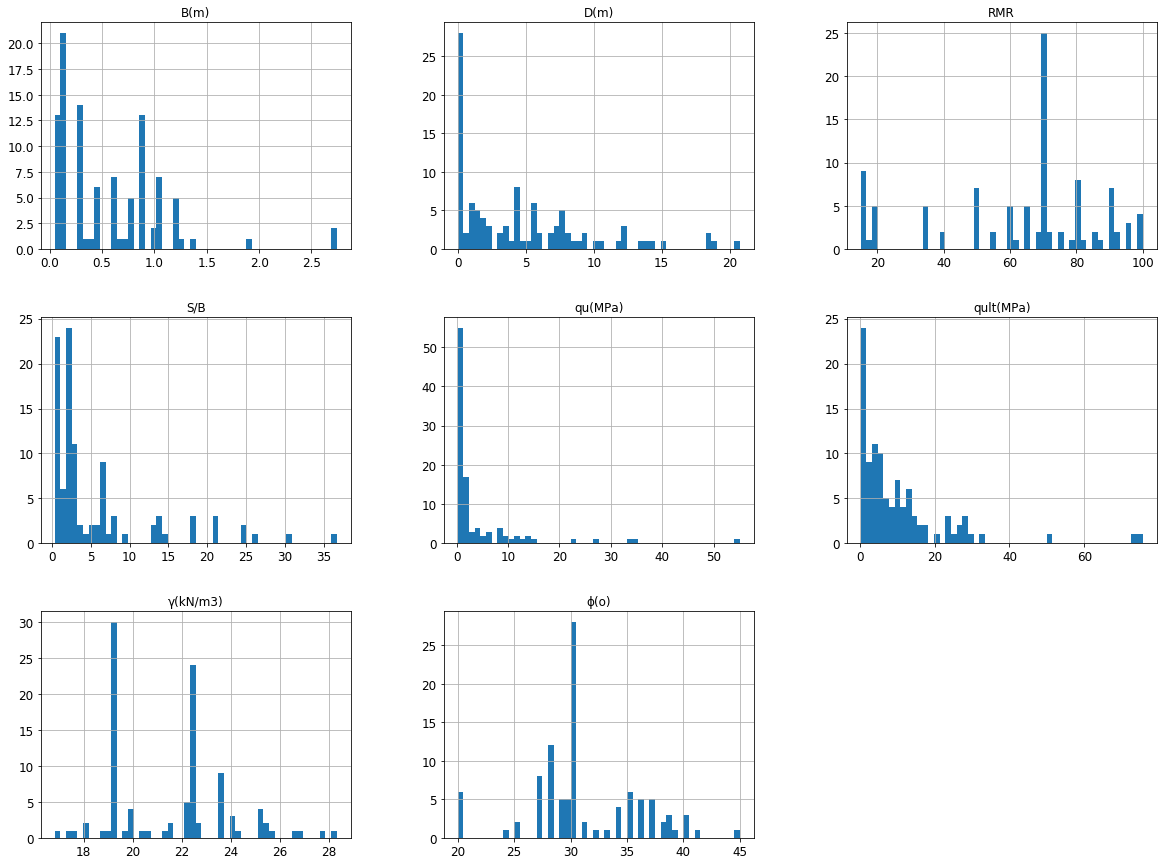

In [8]:
bearing.hist(bins=50, figsize=(20,15))
plt.show()

Visualize the data to gain insights

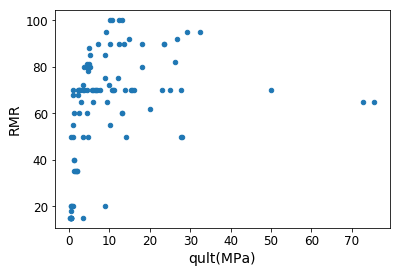

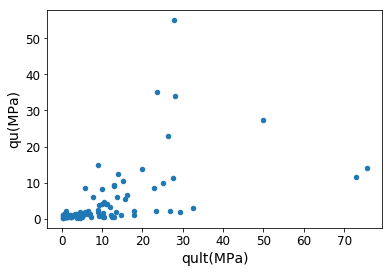

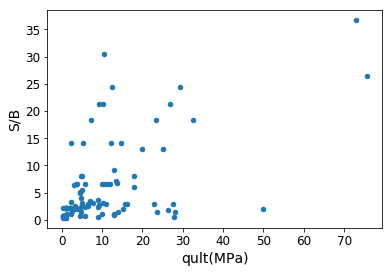

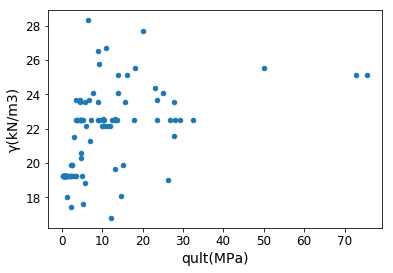

In [24]:
bearing.plot(kind="scatter", y="RMR", x="qult(MPa)")
bearing.plot(kind="scatter", y="qu(MPa)", x="qult(MPa)")
bearing.plot(kind="scatter", y="S/B", x="qult(MPa)")
bearing.plot(kind="scatter", y="γ(kN/m3)", x="qult(MPa)")

Split dataset into training set and test set

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bearing_fit, bearing_label, test_size=0.3) # 70% training and 30% test

The model

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)

scores = cross_val_score(forest_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=5)

#print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Mean: -86.38096295047617
Standard deviation: 92.41669391708977


# Grid search

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg_grid = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg_grid, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train, y_train)

y_pred = grid_search.predict(x_test)

#The best hyperparameter combination found:
print("Best parameters: ", format(grid_search.best_params_))
print("Best cross-validation score: ", format(grid_search.best_score_))
print("Test set score: ", format(grid_search.score(x_test, y_test)))
print("Best estimator:\n{}", format(grid_search.best_estimator_))

Best parameters:  {'max_features': 2, 'n_estimators': 10}
Best cross-validation score:  -51.437996042253516
Test set score:  -75.93170906451613
Best estimator:
{} RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)


C:\Users\alotf\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
